# Processing, saving and plotting netcdfs with xarray

This notebook has example code to access, process, save and plot netcdf files.

## First, load modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# import cf
# import cfplot as cfp
import pandas as pd

from nc_processing import *
from analysis import * 
from plotting import *

%matplotlib inline

## Define the directory and filename from specifications

In [2]:
# define the data directory to search for files using lists
ceda_dir='/badc/cmip6/data/CMIP6/{project}/{centre}/{model}/{exp}/{run}/{domain}/{var}/gn/latest/'
# define the base of the filename for the output file(s) using lists, note this matches the file format in the data directory except for the date_4_file section and the missing .nc. 
out_base='{var}_{domain}_{model}_{exp}_{run}_gn_{time_range}' # all that's missing is a .nc but we can add that later.

let's find some files for the UKESM1 model

In [3]:
model='UKESM1-0-LL'
centre='MOHC'

var='tas'
domain='Amon'

exp='G6sulfur'
project='GeoMIP'

run='r1i1p1f2'

# Let's fill in the blanks in our directory structure with those variables
test_dir = ceda_dir.format(model=model, centre=centre, var=var, domain=domain, exp=exp, project=project, run=run)
# os.listdir just performs a normal "ls" command on the linux system with the text specified within the parentheses.
test_dir_files = os.listdir(test_dir)
print(test_dir_files)

['tas_Amon_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_202001-204912.nc', 'tas_Amon_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_205001-210012.nc']


great, there's two files in there!

## Let's open the file in xarray and see what we've got

In [4]:
# specify the file path to the second file in that directory (python counts from zero for array positions.)
fpath = test_dir + test_dir_files[1]
ds = xr.open_dataset(fpath)

Let's see what's inside

In [5]:
ds

<xarray.Dataset>
Dimensions:    (time: 612, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 2050-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            GeoMIP
    branch_method:          standard
    branch_time_in_child:   61200.0
    branch_time_in_parent:  61200.0
    creation_date:          2019-11-12T11:51:49Z
    ...                     ...
    variable_id:            tas
    variable_name:          tas
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/a54eed95-b088-400a-9e6c-894bf3e4a288

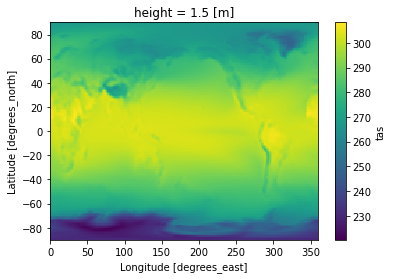

In [6]:
# let's plot the time mean of the data
ds.tas.mean("time").plot()

# Let's concatenate the two files into one

In [7]:
ds1 = xr.open_dataset(test_dir + test_dir_files[0])
ds2 = xr.open_dataset(test_dir + test_dir_files[1])

# add these datasets together concatenating along the time dimension.
ds_combined = xr.concat([ds1, ds2], 'time')

In [8]:
ds_combined.time # FYI leaving a variable on it's own at the end of a cell prints it, i.e. its the same as: print(ds_combined.time) 

<xarray.DataArray 'time' (time: 972)>
array([cftime.Datetime360Day(2020, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2020, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2020, 3, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2100, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2100, 12, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2020-01-16 00:00:00 ... 2100-12-16 00:00:00
    height   float64 1.5
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

Great, it starts in 2020 and ends in 2100 so we've successfully joined those f

## Let's select a time-period

In [9]:
ds_70_100 = ds_combined.sel(time=slice('2070-01-01','2100-01-01'))
ds_70_100.time

<xarray.DataArray 'time' (time: 360)>
array([cftime.Datetime360Day(2070, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2070, 2, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2070, 3, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2099, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2099, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2099, 12, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2070-01-16 00:00:00 ... 2099-12-16 00:00:00
    height   float64 1.5
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

## Let's calculate seasonal means over the entire time period

In [10]:
ds_70_100_seasons = ds_70_100.groupby('time.season').mean(dim='time')

let's check that summer and winter look different

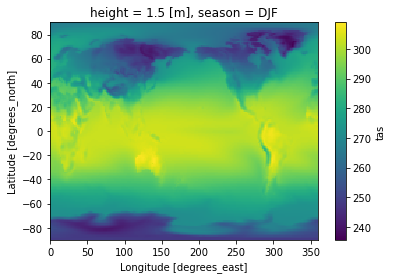

In [11]:
ds_70_100_seasons.tas.sel(season='DJF').plot()

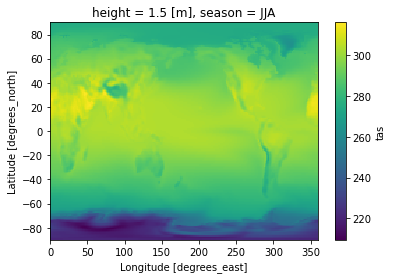

In [12]:
ds_70_100_seasons.tas.sel(season='JJA').plot()

Yup, Northern hemisphere summer is much warmer than the winter.

## NOTE - this simple approach only works as UKESM1 has 30-day months, to deal with months with different numbers of days a more complicated approach is needed: https://xarray.pydata.org/en/stable/examples/monthly-means.html

## NOTE - this fix has not been implemented in the functions below so unless another model you'd like to look at also has only 30-day months then the calculations will be off.

## Open the nc_processing.py file and read through the get_seasonal_mean_std and get_timeslice functions. These wrap up much of what I showed above into a simple to use package.

loading existing files tas_Amon_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_2070-01-01_2100-01-01 ANN


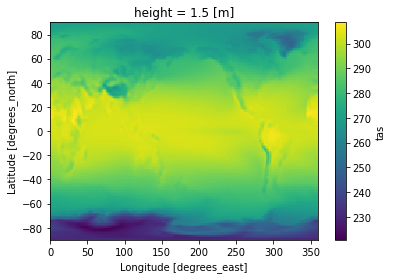

In [13]:
data_dir='/home/users/pjirvine/data/' # !!!!!!!!!!!!! CHANGE THIS !!!!!!!!!!!!!!!!!!

model='UKESM1-0-LL'
centre='MOHC'

var='tas'
domain='Amon'

exp='G6sulfur'
project='GeoMIP'

run='r1i1p1f2'

grid='gn'

season='ANN'
dates=['2070-01-01','2100-01-01']

time_files=1

# load the arguments into a list then... 
args=[season,dates,data_dir,model,centre,var,domain,exp,project,run,grid,time_files]
ds_mean, ds_std = get_seasonal_mean_std(*args) # ... unpack them into the function.

# Let's check the data looks right
ds_mean[var].plot()

# Let's try a simple anomaly

loading existing files tas_Amon_UKESM1-0-LL_G6solar_r1i1p1f2_gn_2070-01-01_2100-01-01 ANN


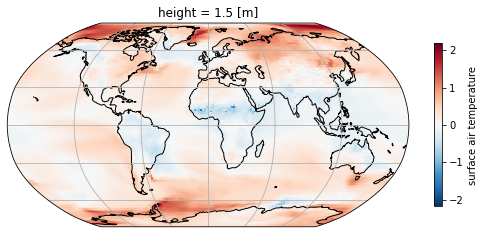

In [14]:
# load the arguments into a list then... 

# just change one variable, the experiment and leave the others as they are.
exp='G6solar'
args=[season,dates,data_dir,model,centre,var,domain,exp,project,run,grid,time_files]
ds_mean_2, ds_std_2 = get_seasonal_mean_std(*args) # ... unpack them into the function.

# Let's plot G6sulfur - Gsolar:
fig = plt.figure(figsize=(9,6)) # let's do a few things to make the plot look nice
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
(ds_mean[var] - ds_mean_2[var]).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5, 'label':'surface air temperature'})

## Right, let's check to see how much of that is statistically significant

The ttest_sub() function is in the analysis.py script. 

In [15]:
num_years = 30 # the t-test needs to know how long our sample is.

# ttest_sub returns a numpy array of P-values, where P is between 0 and 1. for 95% significance P is below 0.05
ttest_pvalue = ttest_sub(ds_mean[var],ds_std[var],num_years,ds_mean_2[var],ds_std_2[var],num_years)

# Let's put the ttest results into the same format as our xarray datasets
ds_ttest = xr.full_like(ds_mean, 0.0) # copy dataset format from ds_mean and set data values to 0.
ds_ttest.rename(name_dict={var:'p_value'}) # rename the variable to p_value
ds_ttest['p_value'] = (['lat','lon'],ttest_pvalue<0.05) # Fill in the blank values with our ttest results

### Let's recreate our anomaly plot, this time with stippling to indicate which areas are statistically significant.

Text(0.5, 1.0, 'G6sulfur - G6solar Temperature anomaly')

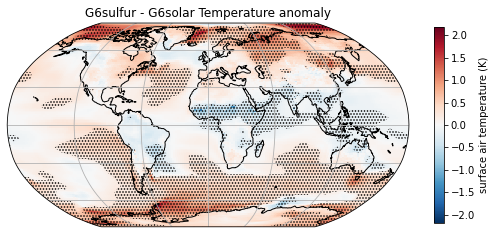

In [16]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
(ds_mean[var] - ds_mean_2[var]).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6, 'label':'surface air temperature (K)'})
cf = ds_ttest['p_value'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=[0,0.05], hatches=["","...."], alpha=0, add_colorbar=False) # cbar_kwargs={'shrink': 0.0})
ax.set_title('G6sulfur - G6solar Temperature anomaly')

## Only the hatched areas are statistically significant

### this is the standard convention but it covers up the most relevant data, so let's reverse it so statistically significant places are unstippled.

Text(0.5, 1.0, 'G6sulfur - G6solar Temperature anomaly')

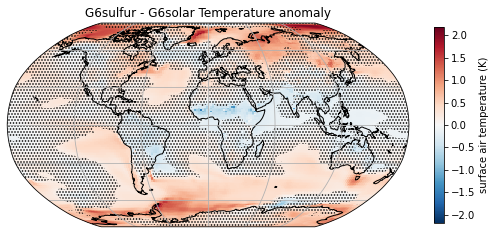

In [17]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
(ds_mean[var] - ds_mean_2[var]).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6, 'label':'surface air temperature (K)'})
cf = ds_ttest['p_value'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=[0,0.05], hatches=["....",""], alpha=0, add_colorbar=False) # cbar_kwargs={'shrink': 0.0})
ax.set_title('G6sulfur - G6solar Temperature anomaly')

# Let's find the global-mean temperature and land-mean temperature

In [18]:
# Use the get_fixed() function to return the gridcell area and land fraction for the model we want.
ds_area, ds_land = get_fixed('MOHC','UKESM1-0-LL') 
# NOTE - to do this for another model, you'll need to look up the run number used in the piControl experiment which stores the fx variables.
# search on CEDA archive for "areacella" and "<MODEL NAME>" and it should show you.

In [19]:
# Let's see what's in the area dataset 
ds_area['areacella']

<xarray.DataArray 'areacella' (lat: 144, lon: 192)>
array([[3.161191e+08, 3.161191e+08, 3.161191e+08, ..., 3.161191e+08,
        3.161191e+08, 3.161191e+08],
       [9.482093e+08, 9.482093e+08, 9.482093e+08, ..., 9.482093e+08,
        9.482093e+08, 9.482093e+08],
       [1.579848e+09, 1.579848e+09, 1.579848e+09, ..., 1.579848e+09,
        1.579848e+09, 1.579848e+09],
       ...,
       [1.579848e+09, 1.579848e+09, 1.579848e+09, ..., 1.579848e+09,
        1.579848e+09, 1.579848e+09],
       [9.482093e+08, 9.482093e+08, 9.482093e+08, ..., 9.482093e+08,
        9.482093e+08, 9.482093e+08],
       [3.161191e+08, 3.161191e+08, 3.161191e+08, ..., 3.161191e+08,
        3.161191e+08, 3.161191e+08]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    standard_name:  cell_area
    long_name:      Grid-Cell Area for Atmospheric Grid Variables
    comment:        For atmospheres with more than 1 mesh (e.g., staggered gr...
    units:          m2
    original_name:  mo: areacella((stash: m01s00i505))
    cell_methods:   area: sum
    history:        2019-07-04T21:31:24Z altered by CMOR: replaced missing va...

You can see that all values on the same latitude are the same, which makes sense.

In [20]:
# What's the total area of this model:
ds_area['areacella'].sum()

<xarray.DataArray 'areacella' ()>
array(5.1010112e+14, dtype=float32)

Great! 5.1*10^14 is the area of the earth.

In [21]:
# Let's see what's in the land fraction dataset 
ds_land['sftlf']

<xarray.DataArray 'sftlf' (lat: 144, lon: 192)>
array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
    type     |S4 ...
Attributes:
    standard_name:   land_area_fraction
    long_name:       Percentage of the grid  cell occupied by land (including...
    comment:         Please express 'X_area_fraction' as the percentage of ho...
    units:           %
    original_name:   mo: (stash: m01s00i505)
    original_units:  1
    history:         2019-07-04T21:31:24Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean
    cell_measures:   area: areacella

land fraction is recorded as a percentage so has values between 0 and 100. NOTE - the array preview shows the first and last 3 rows and columns in the array, starting from the south pole (100% land) and ending at the north pole (100% water).

### Let's calculate the global-mean temperature in the G6sulfur experiment

In [22]:
# Let's define a data array for the area weight of the gridcells
da_weight = ds_area['areacella'] / ds_area['areacella'].sum()
da_weight = da_weight.rename(new_name_or_name_dict='area_weight')
da_weight

<xarray.DataArray 'area_weight' (lat: 144, lon: 192)>
array([[6.1971843e-07, 6.1971843e-07, 6.1971843e-07, ..., 6.1971843e-07,
        6.1971843e-07, 6.1971843e-07],
       [1.8588653e-06, 1.8588653e-06, 1.8588653e-06, ..., 1.8588653e-06,
        1.8588653e-06, 1.8588653e-06],
       [3.0971275e-06, 3.0971275e-06, 3.0971275e-06, ..., 3.0971275e-06,
        3.0971275e-06, 3.0971275e-06],
       ...,
       [3.0971275e-06, 3.0971275e-06, 3.0971275e-06, ..., 3.0971275e-06,
        3.0971275e-06, 3.0971275e-06],
       [1.8588653e-06, 1.8588653e-06, 1.8588653e-06, ..., 1.8588653e-06,
        1.8588653e-06, 1.8588653e-06],
       [6.1971843e-07, 6.1971843e-07, 6.1971843e-07, ..., 6.1971843e-07,
        6.1971843e-07, 6.1971843e-07]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

In [23]:
#looks good let's check that it sums to 1.
da_weight.sum()

<xarray.DataArray 'area_weight' ()>
array(1.0000001, dtype=float32)

Perfect. Now let's calculate our global-mean temperature for G6sulfur

In [24]:
# multiply each temperature value with it's corresponding fraction of total area, then sum to find the global mean.
(ds_mean[var]*da_weight).sum() - 273.15 # convert from K to C.

<xarray.DataArray ()>
array(17.31832275)
Coordinates:
    height   float64 1.5

Great, we've got a global-mean temperature of 17.3C which sounds about right (global-mean temp in the real world was ~13C before pre-industrial, and models are usually around that and we've had some warming in this scenario.)

## Let's calculate the land-mean temperature

First let's get the land area

In [25]:
# land area = gricell area * land fraction ([0-100] * 0.01)
da_land_area = ds_area['areacella'] * ds_land['sftlf'] * 0.01 
da_land_area.sum()

<xarray.DataArray ()>
array(1.4699467e+14, dtype=float32)
Coordinates:
    type     |S4 b'land'

Great, the land area looks right at about 30% of the global area.

In [26]:
# Now let's create a land area weighting
da_land_weight = da_land_area / da_land_area.sum()
da_land_weight.sum()

<xarray.DataArray ()>
array(1., dtype=float32)
Coordinates:
    type     |S4 b'land'

In [27]:
# Now let's create an ocean area weighting
da_ocean_area = ds_area['areacella'] * abs(ds_land['sftlf'] * 0.01 - 1.0)
da_ocean_weight = da_ocean_area / da_ocean_area.sum()
da_ocean_weight.sum()

<xarray.DataArray ()>
array(1., dtype=float32)
Coordinates:
    type     |S4 b'land'

Great, this also sums to 1.

Now let's calculate the land-mean temperature

In [28]:
(ds_mean[var]*da_land_weight).sum() - 273.15 # convert from K to C.

<xarray.DataArray ()>
array(12.69164429)
Coordinates:
    height   float64 1.5
    type     |S4 b'land'

Hmm, 12.7C is quite a lot lower. does that sound right? Let's plot the temperature and see.

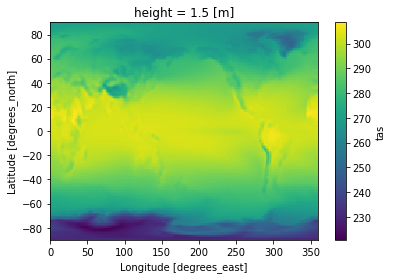

In [29]:
ds_mean[var].plot()

Yes it does. Look how cold antarctica is, and look how much of the yellow (warm) area is ocean.

# Now let's repeat the analysis above but for the whole G6sulfur and G6solar ensemble.

In [30]:
"""
TEST
"""


# # Set variables that are common to all experiments.
# model='UKESM1-0-LL'
# centre='MOHC'
# var='pr' 
# domain='Amon' # pr is an Amon variable.
# grid='gn'
# season='7'

# args_list=[[dates,model,centre,var,domain,exp,project,IDX,grid,time_files] for IDX in runs] # make X lists of input arguments
# tslices = [get_time_slice(*ARGS) for ARGS in args_list] # make a list of X timeslice outputs
# # Combine the X runs into an ensemble dataset along a new "run" dimension
# ds_ens = xr.concat(tslices, "run")
# ds_monthly = ds_ens.sel(time=ds_ens.time.dt.month.isin([int(season)]))   
# ds_seas_mean = ds_monthly.mean(dim=['time','run']) # take mean over years and runs
# ds_seas_std = ds_monthly.std(dim=['time','run'])

# print(ds_seas_std)

'\nTEST\n'

In [31]:
data_dir='/home/users/pjirvine/data/' # !!!!!!!!!!!!! CHANGE THIS !!!!!!!!!!!!!!!!!!

model='UKESM1-0-LL'
centre='MOHC'

var='tas'
domain='Amon'

exp='G6sulfur'
project='GeoMIP'

run='r1i1p1f2'

grid='gn'

#season='ANN'
season='7'
dates=['2070-01-01','2100-01-01']

# This time we specify a list of runs
runs=['r1i1p1f2','r4i1p1f2','r8i1p1f2']

ds_mean, ds_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=1)

loading existing files tas_Amon_UKESM1-0-LL_G6sulfur_ens-mean_gn_2070-01-01_2100-01-01 7 mean


In [32]:
ds_mean_2, ds_std_2 = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, 'G6solar', project, runs, grid, time_files=1)

loading existing files tas_Amon_UKESM1-0-LL_G6solar_ens-mean_gn_2070-01-01_2100-01-01 7 mean


### let's recalculate our T-Test with our 3 ensemble members

NOTE - as we're combining 3 30-year runs our sample is 3 times greater, so we set num_years to 90.

In [33]:
num_years = 90 # the t-test needs to know how long our sample is.

# ttest_sub returns a numpy array of P-values, where P is between 0 and 1. for 95% significance P is below 0.05
ttest_pvalue = ttest_sub(ds_mean[var],ds_std[var],num_years,ds_mean_2[var],ds_std_2[var],num_years)

# Let's put the ttest results into the same format as our xarray datasets
ds_ttest = xr.full_like(ds_mean, 0.0) # copy dataset format from ds_mean and set data values to 0.
ds_ttest.rename(name_dict={var:'p_value'}) # rename the variable to p_value
ds_ttest['p_value'] = (['lat','lon'],ttest_pvalue<0.05) # Fill in the blank values with our ttest results

Text(0.5, 1.0, 'G6sulfur - G6solar Temperature anomaly')

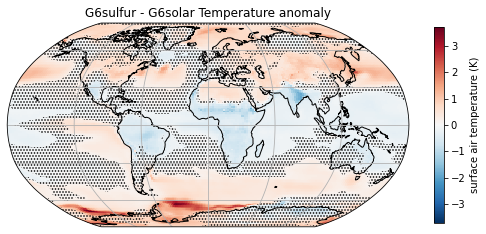

In [34]:
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
(ds_mean[var] - ds_mean_2[var]).plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6, 'label':'surface air temperature (K)'})
cf = ds_ttest['p_value'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=[0,0.05], hatches=["....",""], alpha=0, add_colorbar=False) # cbar_kwargs={'shrink': 0.0})
ax.set_title('G6sulfur - G6solar Temperature anomaly')

### Great, by averaging over 3 runs we've reduced the impact of natural variability and more of the map is statistically significant.

# Let's try my moderated / exacerbated code, and let's make some multi-panel plots.

That's the analysis in my 2019 paper, table 1, etc.: https://www.nature.com/articles/s41558-019-0398-8

First, we'll load precipitation (pr) data for the 3 experiments we'll be comparing:
- Historical 1960-1990
- SSP5-85 2070-2100
- G6sulfur 2070-2100

In [35]:
data_dir='/home/users/pjirvine/data/' # !!!!!!!!!!!!! CHANGE THIS !!!!!!!!!!!!!!!!!!

# Set variables that are common to all experiments.
model='UKESM1-0-LL'
centre='MOHC'
var='pr' 
domain='Amon' # pr is an Amon variable.
grid='gn'
season='ANN'

# specify a list of runs
runs=['r1i1p1f2','r4i1p1f2','r8i1p1f2']

# Load G6sulfur ensemble-mean datasets
exp='G6sulfur'
project='GeoMIP'
dates=['2070-01-01','2100-01-01']
ds_G6sulfur_mean, ds_G6sulfur_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=1)# setting time files to zero.

# Load ssp585 ensemble-mean datasets
project='ScenarioMIP'
exp='ssp585'
dates=['2070-01-01','2100-01-01']
ds_ssp585_mean, ds_ssp585_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=1)# setting time files to zero.

# Load ssp585 ensemble-mean datasets
project='CMIP'
exp='historical'
dates=['1960-01-01','1990-01-01']
ds_historical_mean, ds_historical_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=1)# setting time files to zero.

loading existing files pr_Amon_UKESM1-0-LL_G6sulfur_ens-mean_gn_2070-01-01_2100-01-01 ANN mean
loading existing files pr_Amon_UKESM1-0-LL_ssp585_ens-mean_gn_2070-01-01_2100-01-01 ANN mean
loading existing files pr_Amon_UKESM1-0-LL_historical_ens-mean_gn_1960-01-01_1990-01-01 ANN mean


### let's put this data into my better_worse_off function.

In [36]:
# Call my better_worse_off function, passing in the data_arrays for the variable of interest rather than the full datasets.
better, worse, dunno = better_worse_off(ds_G6sulfur_mean[var], ds_G6sulfur_std[var], ds_ssp585_mean[var], ds_ssp585_std[var], ds_historical_mean[var], ds_historical_std[var], 90, 0.05)

Note - better and worse are returned in the same data_array format as the input data_arrays but dunno is a simple array... something to fix, maybe.

## Let's produce a multi-panel figure comparing the anomalies against the distribution of moderated and exacerbated places.

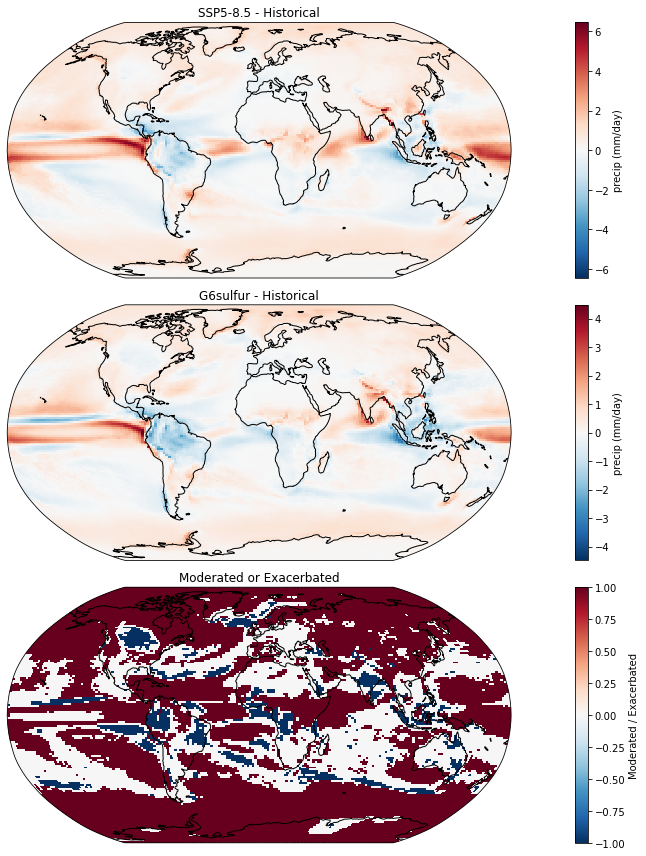

In [37]:
# Let's convert to mm/day
pr_convert = 86400. # kg / m^2 / s --> kg / day == mm / day

fig = plt.figure(figsize=(18,12))

"""
First plot ssp5-85 anomaly
"""
# Create a multi-panel plot with 3 rows, and This plot goes into the first position, counting top-left to bottom right.
# The code: (3, 1, 1) = (3 rows, 1 column, position 1)
ax1 = plt.subplot(3, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
(pr_convert*(ds_ssp585_mean[var] - ds_historical_mean[var])).plot(ax=ax1, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'precip (mm/day)'})
ax1.set_title('SSP5-8.5 - Historical')

"""
Second plot G6sulfur anomaly
"""
# Create a multi-panel plot with 3 plots and This plot goes into row 1, column 1 --> (3, 1, 1).
ax2 = plt.subplot(3, 1, 2, projection=ccrs.Robinson())
ax2.coastlines()
(pr_convert*(ds_G6sulfur_mean[var] - ds_historical_mean[var])).plot(ax=ax2, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'precip (mm/day)'})
ax2.set_title('G6sulfur - Historical')

"""
Third plot Moderated (+1, better) - Exacerbated (-1, worse)
"""
# Create a multi-panel plot with 3 plots and This plot goes into row 1, column 1 --> (3, 1, 1).
ax3 = plt.subplot(3, 1, 3, projection=ccrs.Robinson())
ax3.coastlines()
# convert better and worse from boolean (True, False) to 1s and zeros by adding 0, then pl0t
((better + 0) - (worse + 0)).plot(ax=ax3, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'Moderated / Exacerbated'})
ax3.set_title('Moderated or Exacerbated')

fig.tight_layout()

Few things to figure out to make our multi-panel figures look really nice: getting columns to work nicely, setting common colorbar settings, changing colorscales, title and colorbar label text size, etc. details on how in here: https://kpegion.github.io/Pangeo-at-AOES/examples/multi-panel-cartopy.html

## Nice. G6sulfur has reduced the magnitude of precipitation in most places (red / moderated in bottom panel), increasing the magnitude of change in only a small fraction of places (blue / exacerbated). 

It's hard to see this by eye-balling the top 2 panels as the colorscales are different, but that in itself is telling.

### Now let's calculate the global- and land-area weighted fraction that sees precipitation change moderated and exacerbated

In [38]:
# Calculate fraction as % by multiplying the "better" data-array (1 for better, 0 for other) by the area weight array, then summing over all points.
fraction = 100.*((better + 0) * da_weight).sum().values
print('Fraction of world that sees precipitation moderated: {:.2f} %'.format(fraction))

fraction = 100.*((worse + 0) * da_weight).sum().values
print('Fraction of world that sees precipitation exacerbated: {:.2f} %'.format(fraction))

# Calculate fraction as % by multiplying the "better" data-array (1 for better, 0 for other) by the area weight array, then summing over all points.
fraction = 100.*((better + 0) * da_land_weight).sum().values
print('Fraction of land that sees precipitation moderated: {:.2f} %'.format(fraction))

fraction = 100.*((worse + 0) * da_land_weight).sum().values
print('Fraction of land that sees precipitation exacerbated: {:.2f} %'.format(fraction))


Fraction of world that sees precipitation moderated: 56.45 %
Fraction of world that sees precipitation exacerbated: 7.01 %
Fraction of land that sees precipitation moderated: 53.84 %
Fraction of land that sees precipitation exacerbated: 9.92 %


#### These results are somewhat worse than what I found in my previous work but still there's a much greater fraction of world seeing precipitation change reduced by G6sulfur than there is seeing precipitation change increased.

# Let's try some other models -- work in progress.

First let's build a dictionary to store some model-specific and experiment-specific definitions we can use later

In [39]:
# Here's the list of all models that completed the G6sulfur experiment
model_list = ['CESM2-WACCM','IPSL-CM6A-LR','MPI-ESM1-2-HR','MPI-ESM1-2-LR','UKESM1-0-LL'] 

# let's store all the model-specific details in dictionaries

centre_dict = {'CESM2-WACCM':'NCAR',
               'IPSL-CM6A-LR':'IPSL',
               'MPI-ESM1-2-HR':'MPI-M',
               'MPI-ESM1-2-LR':'MPI-M',
               'UKESM1-0-LL':'MOHC',}

grid_dict = {'CESM2-WACCM':'gn',
             'IPSL-CM6A-LR':'gr',
             'MPI-ESM1-2-HR':'gn',
             'MPI-ESM1-2-LR':'gn',
             'UKESM1-0-LL':'gn',}

# Let's do the same for projects for our experiments:

exp_list = ['historical','ssp585','G6sulfur','G6solar']

project_dict = {'historical':'CMIP',
                'ssp585':'ScenarioMIP',
                'G6sulfur':'GeoMIP',
                'G6solar':'GeoMIP',}

# Let's find all the runs for all of the model / experiment combinations:

run_dict = {} # to store the list of runs for each combination

# each experiment for each model may have different runs, so we loop over all combinations.
for model in model_list:
    for exp in exp_list:
        
        # Specify the directory just above where the runs are stored, so we can check what's in it.
        run_dir='/badc/cmip6/data/CMIP6/{project}/{centre}/{model}/{exp}/'.format(model=model, centre=centre_dict[model], exp=exp, project=project_dict[exp])
        
        # This try / except structure catches errors and rather than crashing does something.
        try:
            # os.listdir() lists the content of a directory, they stuff around it screens out all non-directory results (isdir() checks if its a directory)
            run_dirs = [ name for name in os.listdir(run_dir) if os.path.isdir(os.path.join(run_dir, name)) ]
            # store the resulting list of runs in our dictionary.
            run_dict[model,exp] = run_dirs
        # If an error is found let's print it out
        except FileNotFoundError as error:
            print(model,exp)
            print(error)
            run_dict[model,exp] = None # None is a special "empty" type of variable.
        #end try
    #end exp loop
#end model loop
"""
NOTE - Python uses indentation to mark the end of loops, function definitions, etc. I find it useful to label these ends with comments, they're not needed.
"""

MPI-ESM1-2-HR ssp585
[Errno 2] No such file or directory: '/badc/cmip6/data/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-HR/ssp585/'


"\nNOTE - Python uses indentation to mark the end of loops, function definitions, etc. I find it useful to label these ends with comments, they're not needed.\n"

In [40]:
run_dict

{('CESM2-WACCM', 'historical'): ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
 ('CESM2-WACCM', 'ssp585'): ['r1i1p1f1',
  'r2i1p1f1',
  'r3i1p1f1',
  'r4i1p1f1',
  'r5i1p1f1'],
 ('CESM2-WACCM', 'G6sulfur'): ['r1i1p1f2', 'r2i1p1f2'],
 ('CESM2-WACCM', 'G6solar'): ['r1i1p1f1', 'r1i2p1f1'],
 ('IPSL-CM6A-LR', 'historical'): ['r10i1p1f1',
  'r11i1p1f1',
  'r12i1p1f1',
  'r13i1p1f1',
  'r14i1p1f1',
  'r15i1p1f1',
  'r16i1p1f1',
  'r17i1p1f1',
  'r18i1p1f1',
  'r19i1p1f1',
  'r1i1p1f1',
  'r20i1p1f1',
  'r21i1p1f1',
  'r22i1p1f1',
  'r23i1p1f1',
  'r24i1p1f1',
  'r25i1p1f1',
  'r26i1p1f1',
  'r27i1p1f1',
  'r28i1p1f1',
  'r29i1p1f1',
  'r2i1p1f1',
  'r30i1p1f1',
  'r31i1p1f1',
  'r32i1p1f1',
  'r3i1p1f1',
  'r4i1p1f1',
  'r5i1p1f1',
  'r6i1p1f1',
  'r7i1p1f1',
  'r8i1p1f1',
  'r9i1p1f1'],
 ('IPSL-CM6A-LR', 'ssp585'): ['r14i1p1f1',
  'r1i1p1f1',
  'r2i1p1f1',
  'r33i1p1f1',
  'r3i1p1f1',
  'r4i1p1f1',
  'r6i1p1f1'],
 ('IPSL-CM6A-LR', 'G6sulfur'): ['r1i1p1f1'],
 ('IPSL-CM6A-LR', 'G6solar'): ['r1i1p1f1'],

In [41]:
run_dict['UKESM1-0-LL', 'historical']

['r10i1p1f2',
 'r11i1p1f2',
 'r12i1p1f2',
 'r16i1p1f2',
 'r17i1p1f2',
 'r18i1p1f2',
 'r19i1p1f2',
 'r1i1p1f2',
 'r2i1p1f2',
 'r3i1p1f2',
 'r4i1p1f2',
 'r5i1p1f3',
 'r6i1p1f3',
 'r7i1p1f3',
 'r8i1p1f2',
 'r9i1p1f2']

Nice, there are all the runs for the UKESM1 historical experiment

### Let's make a self-contained code-box that does everthing needed to plot results for a single ensemble member for each model (as all have only 1 ensemble member for G6sulfur)

ERK. My attempt didn't work at all.

Some issues I've discovered:
- run names are NOT consistently used across experiments -- how to identify matching runs? Do we need to?
- IPSL's time/date is not in the same format as UKESM1 and doesn't have the 'year' attribute I was using to process the data.

# OK, let's try using some of those new modules

### cfplot has a bug, may reinstate later

Here's a link to a practical where I run through how to do various edits to the map plots. Some of this will be transferrable to the above xarray examples, some will be specific to cfplot.

https://github.com/pjirvine/Principles_Climate_20-21/blob/main/Practical%20Week%204/Practical_Notebook_Week_4_Solution.ipynb
https://github.com/pjirvine/Principles_Climate_20-21/blob/main/Practical%20Week%204/Practical_Notebook_Week_4_Workbook.ipynb


In [42]:
# # Set variables that are common to all experiments.
# model='UKESM1-0-LL'
# centre='MOHC'
# var='pr' 
# domain='Amon' # pr is an Amon variable.
# grid='gn'
# season='ANN'

# # specify a list of runs
# runs=['r1i1p1f2','r4i1p1f2','r8i1p1f2']

# # Load G6sulfur ensemble-mean datasets
# exp='G6sulfur'
# project='GeoMIP'
# dates=['2070-01-01','2100-01-01']
# ds_G6sulfur_mean, ds_G6sulfur_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=1)# setting time files to zero.

# lats = ds_G6sulfur_mean.lat.values
# lons = ds_G6sulfur_mean.lon.values
# plot_data = ds_G6sulfur_mean[var].values

# cfp.con(f=plot_data, x=lons, y=lats, ptype=1)

I might elaborate this below using stuff from the example but that's for later...

### Now, let's try xclim

In [43]:
model='UKESM1-0-LL'
centre='MOHC'

var='tas'
domain='day'

exp='G6sulfur'
project='GeoMIP'

run='r1i1p1f2'

dates=['2070-01-01','2099-12-30'] # NOTE - UKESM1 has a 360-day calendar with 30-day months
# If we specify 2100-01-01 we catch january 1st which is used to calculate the 2100 value.
# You'll need to check the calendar used by different models.

# Let's fill in the blanks in our directory structure with those variables
test_dir = ceda_dir.format(model=model, centre=centre, var=var, domain=domain, exp=exp, project=project, run=run)
# os.listdir just performs a normal "ls" command on the linux system with the text specified within the parentheses.
test_dir_files = os.listdir(test_dir)
print(test_dir_files)

['tas_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20200101-20491230.nc', 'tas_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20500101-21001230.nc']


In [44]:
ds_day = xr.open_dataset(test_dir + test_dir_files[1])

In [45]:
gdd = xclim.indices.growing_degree_days(tas=ds_day.tas, thresh='10.0 degC', freq='YS')

NameError: name 'xclim' is not defined

In [ ]:
gdd.mean(dim='time').plot()

### that looks about right, The US has a value between 6000 and 2000 Growing degree days.

In [ ]:
model='UKESM1-0-LL'
centre='MOHC'

var='tas'
domain='day'

run='r1i1p1f2'

dates=['2070-01-01','2099-12-30'] # NOTE - UKESM1 has a 360-day calendar with 30-day months

index_name = 'growing_degree_days'

# specify the arguments for the xclim index call.
index_kwargs={'tas':None, # !!!! THIS None WILL BE REPLACED WITH OUTPUT FROM get_time_slice() !!!!
              'thresh':'10.0 degC',
              'freq':'YS',
             }

project='GeoMIP'
exp='G6solar'

# let's call get_index_series. as it outputs an xarray dataset array let's call our output da_gdd
# Note despite the fact we've calculated growing degree days the input variable 'tas' has been used
# to name the variable stored in this dataset.
da_gdd = get_index_series(dates, data_dir, model, centre, var, domain, exp, project, run, grid, index_name, index_kwargs, time_files=time_files, index_name_file=None, index_args=[], over_write=False)

In [ ]:
# This function returns a dataset so we need to specify the variable so we can plot the data-array inside
da_gdd[var].mean(dim='time').plot()

### Great, my function worked.

# If you want to make a table, this bit of code will help.

In [ ]:
var_list = ['a','b'] # the outer_dict will specify the columns: 'a', 'b'
metric_list = ['c','d'] # the inner_dict will specify the rows: 'c', 'd'

dict_outer = {} # specify an empty dictionary
for var in var_list:
    dict_inner = {} # refresh / empty this inner dictionary
    # this loop would work if you've got one calculation, but if you have 
    # a list of calculations just get rid of it and run your calculations
    # one after the other.
    for metric in metric_list:
        # dict['key'] = value # is how you add an entry to dictionaries
        dict_inner[metric] = 0. # Here you'd replace this with some calculation
    dict_outer[var] = dict_inner # fill the outer dictionary with the inner dict.
    #end for metric
#end for var

# Turn the "nested" dictionary into a pandas dataframe
df = pd.DataFrame.from_dict(dict_outer)
# Export the dataframe to a CSV file (can be read by excel, etc.)
df.to_csv('test.csv')


# Let's try some volcano data

In [ ]:
# The directory where this experiment is stored
volc_dir = '/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppC-forecast-addPinatubo/s2014-r1i1p1f2/Amon/tas/gn/latest/'

# Make a list of all the files in that directory
files = os.listdir(volc_dir)

# open each of the files in that directory as an xarray
ds_list = [xr.open_dataset(volc_dir + FILE) for FILE in files]

# stick them all together.
ds_volcano = xr.concat(ds_list, dim='time')

In [ ]:
# The directory where this experiment is stored
no_volc_dir = '/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/s2014-r1i1p1f2/Amon/tas/gn/latest/'

# Make a list of all the files in that directory
files = os.listdir(no_volc_dir)

# open each of the files in that directory as an xarray
ds_list = [xr.open_dataset(no_volc_dir + FILE) for FILE in files]

# stick them all together.
ds_no_volcano = xr.concat(ds_list, dim='time')

### Rachel, once you've got some other stuff working - try calculating the global-mean temperature using the above datasets then plotting them. you should hopefully see the evolution of the cooling following the eruption, though it'll be very noisy.

In [ ]:
data_dir='/home/users/pjirvine/data/' # !!!!!!!!!!!!! CHANGE THIS !!!!!!!!!!!!!!!!!!

model='HadGEM3-GC31-MM' # sister model to UKESM
centre='MOHC'

var='tas'
domain='Amon'

exp='dcppC-forecast-addPinatubo' # 'dcppC-forecast-addAgung', 'dcppC-forecast-addElChichon' are the other experiments
project='DCPP'

# For these volcano runs, the run-name tells you what year it starts in. 
# The run names match in the "hindcast" runs that you'll compare against.
# They'll also be the same for all the "add-<VOLCANO>" runs.
runs=['s2014-r10i1p1f2', 's2014-r2i1p1f2', 's2014-r4i1p1f2', 's2014-r6i1p1f2', 's2014-r8i1p1f2', 
      's2014-r1i1p1f2', 's2014-r3i1p1f2', 's2014-r5i1p1f2', 's2014-r7i1p1f2', 's2014-r9i1p1f2']

grid='gn'

season='ANN'
dates=['2015-07-01','2016-06-30'] # let's grab 1-year starting 6 months into 2015. FYI this model has 360-days in year so all months have 30 days

"""
Let's get the ensemble-mean, time-average for the add-pinatubo run for the year selected + standard deviation around that.
"""
add_pinatubo_mean, add_pinatubo_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=0)

"""
Now let's get the matching hind-cast
"""

exp='dcppA-hindcast'

# calling it hindcast 2014 to match the year the runs start on.
hindcast_2014_mean, hindcast_2014_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=0)


In [ ]:
(add_pinatubo_mean['tas'] - hindcast_2014_mean['tas']).plot()

## Great, we have a volcanic signal!

Volcanoes cool most places BUT they've also been observed to cause a warming in the arctic too. So our signal looks pretty spot on.

### Now, let's get the subtract pinatubo runs and do the same

In [ ]:
model='HadGEM3-GC31-MM' # sister model to UKESM
centre='MOHC'

var='tas'
domain='Amon'

exp='dcppC-hindcast-noPinatubo' # 'dcppC-hindcast-noAgung', 'dcppC-hindcast-noElChichon' are the other experiments
project='DCPP'

# Select the runs for 1990 start
runs=['s1990-r10i1p1f2','s1990-r2i1p1f2','s1990-r4i1p1f2','s1990-r6i1p1f2','s1990-r8i1p1f2',
      's1990-r1i1p1f2','s1990-r3i1p1f2','s1990-r5i1p1f2','s1990-r7i1p1f2','s1990-r9i1p1f2']

grid='gn'

season='ANN'
dates=['1992-01-01','1992-12-30'] # Pinatubo went off in June 15th 1991, so let's just grab all of 1992.

"""
Let's get the ensemble-mean, time-average for the add-pinatubo run for the year selected + standard deviation around that.
"""
sub_pinatubo_mean, sub_pinatubo_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=0)

"""
Now let's get the matching hind-cast
"""

exp='dcppA-hindcast'

# calling it hindcast 1990 to match the year the runs start on.
hindcast_1990_mean, hindcast_1990_std = get_ens_seasonal_mean_std(season, dates, data_dir, model, centre, var, domain, exp, project, runs, grid, time_files=0)


In [ ]:
(sub_pinatubo_mean['tas'] - hindcast_1990_mean['tas']).plot()

### OK, that looks about right
Now we have kind of the opposite pattern (we're subtracting a volcano this time), there's a bit of a sign of a difference at high latitudes but its not as substantial.

You'll have to read more about how these runs are set up to interpret this, e.g. are all the runs in the same phase of the el nino / la nina ENSO cycle?

# Let's do a simple zonal plot

In [ ]:
"""
All the options for fine-tuning this figure can be found by googling around for "matplotlib plot" + "<thing you want to do>"
"""

# Let's subtract the hindcast (with pinatubo) from the simulation without to see the effect of pinatubo.
plot_data = hindcast_1990_mean['tas'].mean(dim='lon').values - sub_pinatubo_mean['tas'].mean(dim='lon').values 
# we can do a simple zonal mean as all points on the same longitude have the same area.

plot_lats = sub_pinatubo_mean['tas'].lat.values
# .values will return the numpy array containing the data without any of the metadata, like dimension names, etc.

# Now we specify the x and y data for the line plot:
plt.plot(plot_lats, plot_data)

# you can add multiple lines with repeated calls to plt.plot() with different data.

# and set our plot limits
plt.xlim([-90,90])
plt.ylim([-0.8,0])
plt.ylabel('Temperature change (K)')
plt.xlabel('Latitude (degrees)')
plt.title('Temperature response to Pinatubo eruption')

nice!

# Right, let's plot a timeseries

In [ ]:
data_dir='/home/users/pjirvine/data/' # !!!!!!!!!!!!! CHANGE THIS !!!!!!!!!!!!!!!!!!

model='UKESM1-0-LL'
centre='MOHC'

var='gpp'
domain='Lmon'

exp='G6sulfur'
project='GeoMIP'

run='r1i1p1f2'

runs=['r1i1p1f2', 'r4i1p1f2', 'r8i1p1f2']

grid='gn'

season='ANN'

# let's get the area and land mask
ds_area, ds_land_mask = get_fixed(centre, model)

# we'll use the area-weight to calculate the global-mean change
weight = ds_area['areacella'] / np.sum(ds_area['areacella']) # We divide by total so it sums to 1.

"""
get data for different experiments - this may take some time.
"""
exp='G6sulfur'
project='GeoMIP'
g6sulfur_ens = get_all_time_ens(model, centre, var, domain, exp, project, runs, grid)
# average over all runs
g6sulfur_ens_mean = g6sulfur_ens[var].mean(("run"))

print('g6sulfur done')

project='ScenarioMIP'
exp='ssp585'
ssp585_ens = get_all_time_ens(model, centre, var, domain, exp, project, runs, grid)
# average over all runs
ssp585_ens_mean = ssp585_ens[var].mean(("run"))

print('ssp585 done')

project='ScenarioMIP'
exp='ssp245'
ssp245_ens = get_all_time_ens(model, centre, var, domain, exp, project, runs, grid)
# average over all runs
ssp245_ens_mean = ssp245_ens[var].mean(("run"))

print('ssp245 done')

project='CMIP'
exp='historical'
historical_ens = get_all_time_ens(model, centre, var, domain, exp, project, runs, grid)
# average over all runs
historical_ens_mean = historical_ens[var].mean(("run"))

print('historical done')

In [ ]:
# How many months for running mean?
smooth_months = 12

# Create global, area-weighted mean timeseries
g6sulfur_timeseries = (weight * g6sulfur_ens_mean).sum(("lon","lat"))#.values
ssp585_timeseries = (weight * ssp585_ens_mean).sum(("lon","lat"))#.values
ssp245_timeseries = (weight * ssp245_ens_mean).sum(("lon","lat"))#.values
historical_timeseries = (weight * historical_ens_mean).sum(("lon","lat"))#.values

# create plot time timeseries
def plot_time_func(timeseries):
    time_len = len(timeseries.time.values)
    start_year = timeseries.time.values[0].year
    plot_time = [start_year + (idx + 1)/12 for idx in range(time_len)]
    return plot_time

# create plot timeseries
time_historical = plot_time_func(historical_timeseries)
time_g6sulfur = plot_time_func(g6sulfur_timeseries)
time_ssp585 = plot_time_func(ssp585_timeseries)
time_ssp245 = plot_time_func(ssp245_timeseries)

plt.plot(time_historical, historical_timeseries.rolling(time=smooth_months, center=True).mean())
plt.plot(time_g6sulfur, g6sulfur_timeseries.rolling(time=smooth_months, center=True).mean())
plt.plot(time_ssp585, ssp585_timeseries.rolling(time=smooth_months, center=True).mean())
plt.plot(time_ssp245, ssp245_timeseries.rolling(time=smooth_months, center=True).mean())

plt.title(var)
plt.ylabel(var)

plt.xlim([2000,2100])
# plt.ylim([286,295])

In [ ]:
ssp245_timeseries.time.values[0].year

In [ ]:
# calculate months since start, note the actual time values didn't plot
plot_time = [idx + 1 for idx in range(len(time))] 
plt.plot(plot_time, pinatubo_timeseries - hindcast_timeseries)
plt.xlim([0,120])

Noisy but the cooling signal is there! Which month did Pinatubo go off? Was it jan 1990, month 1?

# Fraction Plot(s)

# Stack of fraction plots

In [ ]:
# Define colours
red = '#ff0000'
l_red = '#ffc0c0' # old: '#ffd9d9'
blue = '#0066ff'
l_blue = '#c0c0ff' # old:'#b2d0ff'

color_list = [red, l_red, l_blue, blue]

"""
Generate some fake data
"""

# 20 sets of fake data
num_fractions = 20

def fraction_maker():
    fractions_rand = list(np.random.rand(4))
    fraction_total = sum(fractions_rand)
    fractions = [F/fraction_total for F in fractions_rand]
    return fractions

fraction_stack = []
label_stack = []

for idx in range(num_fractions):
    label_stack.append('stack ' + str(idx))
    fraction_stack.append(fraction_maker())
   
"""
Plot the data
"""

fig, ax = plt.subplots()

box_fraction_stack(ax, fraction_stack, label_stack, color_list)

ax.get_xaxis().set_visible(False)

# Rack of vertical fraction plots

In [ ]:
# Define colours
red = '#ff0000'
l_red = '#ffc0c0' # old: '#ffd9d9'
blue = '#0066ff'
l_blue = '#c0c0ff' # old:'#b2d0ff'

color_list = [red, l_red, l_blue, blue]

"""
Generate some fake data
"""

# 20 sets of fake data
num_fractions = 20

def fraction_maker():
    fractions_rand = list(np.random.rand(4))
    fraction_total = sum(fractions_rand)
    fractions = [F/fraction_total for F in fractions_rand]
    return fractions

fraction_rack = []
label_rack = []

for idx in range(num_fractions):
    label_rack.append('rack ' + str(idx))
    fraction_rack.append(fraction_maker())
   
"""
Plot the data
"""

fig, ax = plt.subplots()

box_fraction_rack(ax, fraction_rack, label_rack, color_list)

ax.get_yaxis().set_visible(False)

# Stacked, racked fraction plots

In [ ]:
"""
Generate some more fake data
"""

# 20 sets of fake data
num_stacks = 20
num_racks = 15

fraction_stacks = []
label_stack = []
label_rack = []

for idx in range(num_stacks):
    label_stack.append('stack ' + str(idx))

for idx in range(num_racks):
    label_rack.append('rack ' + str(idx))
    
    fraction_stack = []
    for idx in range(num_stacks):
        fraction_stack.append(fraction_maker())
        
    fraction_stacks.append(fraction_stack)
    
"""
Plot the data
"""

fig, ax = plt.subplots()

box_fraction_stack_rack(ax, fraction_stacks, label_stack, label_rack, color_list)

# ax.get_xaxis().set_visible(False)

In [ ]:
"""
Solution to monthly unevenness
https://stackoverflow.com/questions/39985059/compute-annual-mean-using-x-arrays
"""

def weighted_temporal_mean(ds, var):
  """
  weight by days in each month
  """
  # Determine the month length
  month_length = ds.time.dt.days_in_month

  # Calculate the weights
  wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

  # Make sure the weights in each year add up to 1
  np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)

  # Subset our dataset for our variable
  obs = ds[var]

  # Setup our masking for nan values
  cond = obs.isnull()
  ones = xr.where(cond, 0.0, 1.0)

  # Calculate the numerator
  obs_sum = (obs * wgts).resample(time="AS").sum(dim="time")

  # Calculate the denominator
  ones_out = (ones * wgts).resample(time="AS").sum(dim="time")

  # Return the weighted average
  return obs_sum / ones_out

average_weighted_temp = weighted_temporal_mean(ds_first_five_years, 'TEMP')

# Let's try out my efficacy metric on the GLENS geoengineering experiment

I'll start by trying this out on some different data: the GLENS geoengineering experiment

In [ ]:
# run_list = ['001','002','003','021']

# var_list = ['TREFHT','TREFHTMX','PRECT','P-E','PRECTMX']

# exp_list = ['control','feedback']

# date_dict = {'control':'201001-209912', 'feedback':'202001-209912'}

In [ ]:
# def get_glens_ds(exp, var, run):
#     """
#     Only works for the runs that match the date_dict, i.e. not the short control runs.
#     """
#     # the date ranges that go with each experiment
#     date_dict = {'control':'201001-209912', 'feedback':'202001-209912'}

#     # specify the directory and file path
#     glens_dir = '/home/users/pjirvine/projects/GLENS_fraction_better_off/glens_data/'
#     glens_file = '{exp}.{run}.cam.h0.{var}.ann.{date_range}.nc'.format(exp=exp, var=var, run=run, date_range=date_dict[exp])
#     fpath = glens_dir + glens_file

#     # open the netcdf with xarray
#     ds = xr.open_dataset(fpath)
    
#     # return ds
#     return ds
# # end def

# def get_glens_mean_std(exp, var, run, time_slice):

#     # Get the glens ds
#     ds = get_glens_ds(exp, var, run)

#     # take the time slice
#     ds_tslice = ds.sel(time=slice(time_slice[0],time_slice[1]))

#     # calculate time mean and std
#     ds_mean = ds_tslice.mean(dim='time')
#     ds_std = ds_tslice.std(dim='time')

#     # return mean and std
#     return ds_mean, ds_std
# # end def

# def get_glens_zonal_mean_std(exp, var, run, time_slice):

#     # Get the glens ds
#     ds = get_glens_ds(exp, var, run)

#     # take the time slice
#     ds_tslice = ds.sel(time=slice(time_slice[0],time_slice[1]))

#     ds_zonal = ds_tslice.mean(dim='lon')
    
#     # calculate time mean and std
#     ds_zonal_mean = ds_zonal.mean(dim='time')
#     ds_zonal_std = ds_zonal.std(dim='time')

#     # return mean and std
#     return ds_zonal_mean, ds_zonal_std
# # end def

# def efficacy(control_mean, GHG_mean, SG_mean, denom_min=None):
    
#     # define numerator and denominator
#     numerator = GHG_mean - SG_mean
#     denom = GHG_mean - control_mean
    
#     # apply denom_min if set
#     if denom_min is not None:
#         if type(control_mean) is xr.core.dataarray.DataArray:
#             denom.where(denom > denom_min, denom_min)
#             print('xarray')
#         elif type(control_mean) is np.ndarray:
#             denom = np.where(abs(denom) > denom_min, denom, denom_min)
#             print('np array')
#         else:
#             print(type(control_mean))
#             print('type must be numpy array or xarray data array')
#             return
    
#     #calculate then return
#     eff = numerator / denom
#     return eff
# # end def

In [ ]:
# # get_glens_annual_mean_std(exp, run, var, time_slice):

# run = '001'
# dates_end = ['2075-01-01','2095-01-01']
# dates_start = ['2010-01-01','2030-01-01']

# fig = plt.figure(figsize=(9,6))

# """
# First plot T anomalies
# """

# var = 'TREFHT'

# SSP585_mean, SSP585_std = get_glens_zonal_mean_std('control', var, run, dates_end)
# base_mean, base_std = get_glens_zonal_mean_std('control', var, run, dates_start)
# GLENS_mean, GLENS_std = get_glens_zonal_mean_std('feedback', var, run, dates_end)

# # Create a multi-panel plot with 3 rows, and This plot goes into the first position, counting top-left to bottom right.
# # The code: (3, 1, 1) = (3 rows, 1 column, position 1)
# ax1 = plt.subplot(2, 2, 1)

# # SSP5-8.5 anomaly
# plot_data = SSP585_mean[var] - base_mean[var]
# ax1.plot(plot_data['lat'], plot_data, color='r')

# # GLENS anomaly
# plot_data = GLENS_mean[var] - base_mean[var]
# ax1.plot(plot_data['lat'], plot_data, color='b')

# #zero line
# ax1.plot(plot_data['lat'], np.zeros(plot_data['lat'].shape), color='k')

# # create second subplot for efficacy
# ax2 = plt.subplot(2, 2, 3)

# eff = efficacy(base_mean[var], SSP585_mean[var], GLENS_mean[var])
# eff_min = efficacy(base_mean[var], SSP585_mean[var], GLENS_mean[var], denom_min=0.5)

# ax2.plot(plot_data['lat'], eff, color='k')
# ax2.plot(plot_data['lat'], eff_min, color='k', linestyle='dashed')

# #zero line
# ax2.plot(plot_data['lat'], np.zeros(plot_data['lat'].shape), color='k')

# """
# Then plot P anomalies
# """

# var = 'PRECT'
# pr_convert = 86400. * 1000.

# SSP585_mean, SSP585_std = get_glens_zonal_mean_std('control', var, run, dates_end)
# base_mean, base_std = get_glens_zonal_mean_std('control', var, run, dates_start)
# GLENS_mean, GLENS_std = get_glens_zonal_mean_std('feedback', var, run, dates_end)

# # Create a multi-panel plot with 3 rows, and This plot goes into the first position, counting top-left to bottom right.
# # The code: (3, 1, 1) = (3 rows, 1 column, position 1)
# ax3 = plt.subplot(2, 2, 2)

# # SSP5-8.5 anomaly
# plot_data = pr_convert * (SSP585_mean[var] - base_mean[var])
# ax3.plot(plot_data['lat'], plot_data, color='r')

# # GLENS anomaly
# plot_data = pr_convert * (GLENS_mean[var] - base_mean[var])
# ax3.plot(plot_data['lat'], plot_data, color='b')

# #zero line
# ax3.plot(plot_data['lat'], np.zeros(plot_data['lat'].shape), color='k')

# # create second subplot
# ax4 = plt.subplot(2, 2, 4)

# eff = efficacy(base_mean[var], SSP585_mean[var], GLENS_mean[var])
# eff_min = efficacy(pr_convert * base_mean[var].values, pr_convert * SSP585_mean[var].values, pr_convert * GLENS_mean[var].values, denom_min=0.1)

# ax4.plot(plot_data['lat'], eff, color='k')
# ax4.plot(plot_data['lat'], eff_min, color='r')

# #zero line
# ax4.plot(plot_data['lat'], np.zeros(plot_data['lat'].shape), color='k')

In [ ]:
# plot_data['lat'].shape

In [ ]:
# type(SSP585_mean[var].values)

In [ ]:
# eff_min